### Explanation
The picture is a visual representation of the graph we can use. L1, L2 and L3 are different trajectories. L1 can be represented 3 different ways by using different slots, L2 and L3 in 2 different ways (in reality will be way more since we use 5 slots per station). It shows all possible combinations of paths, in any way you can go from the start node to the end node it is a possible combination of paths. For example, if you want to try the combination of the first possible paths for all three paths, you follow start -> 1 -> 1-> 1 -> end (equiv to start -> A -> A1 -> A1a -> end, these blue names are to make sure each node has a unique name, in reality A1, B1 and C1 are all the same path of L2). The outgoing edges from start and the ingoing edges from end have weight 0 because they only exist to make dijkstra work.

The graph below is what we should generate for the dijkstra below to work. The pruning of some branches because eg B1 is not possible anymore because B takes up one of its slots should preferrably be done before, so that the resulting graph that we use really symbolizes all _possible_ combinations of paths. The weights symbolize the cost (which are now imaginary). In reality this is our cost, the amount of intersections a combination of paths have.

In case you cant see the image, i uploaded it to github as well <3

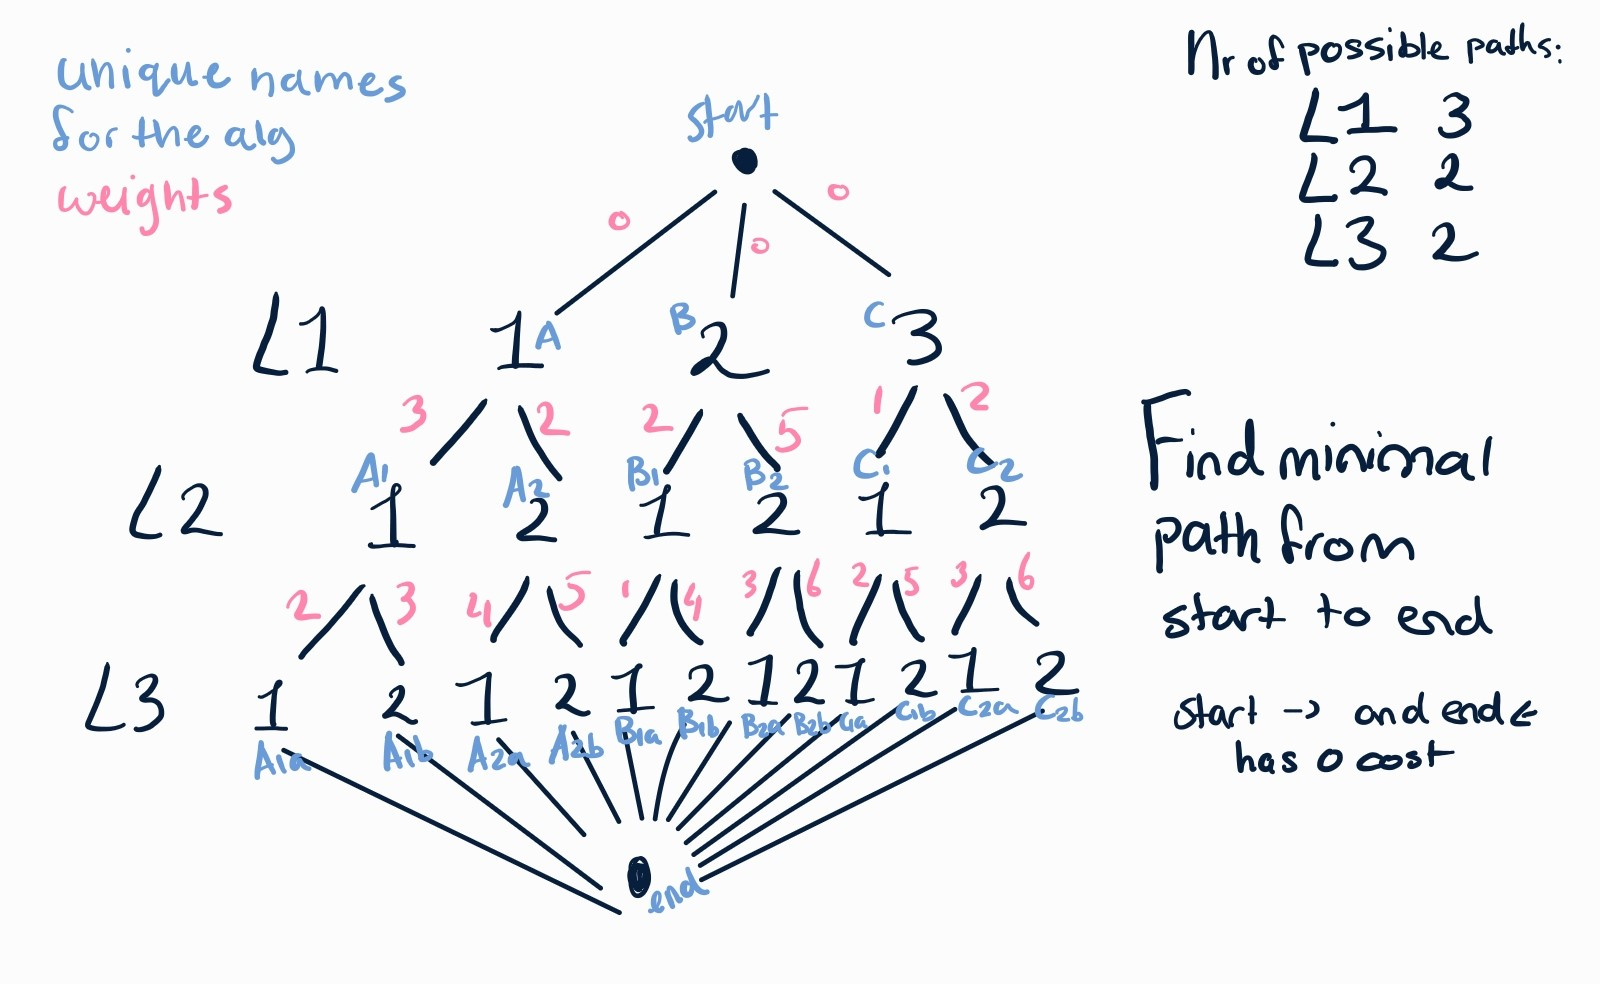

In [14]:
# #The weights right now are imaginary, in reality we should calculate these based on the intersections
# graph = {
#     'Start': {'A': 0, 'B': 0, 'C': 0},
#     #this would mean that drawing A and A1 together results in 3 intersections, and drawing A and A2 together results in 4 
#     'A': {'A1': 3, 'A2': 4},
#     'B': {'B1': 2, 'B2': 5},
#     'C': {'C1': 1, 'C2': 6},
#     #drawing A1a with A and A1 would result in an additional 2 intersections.
#     'A1': {'A1a': 2, 'A1b': 3},
#     'A2': {'A2a': 4, 'A2b': 5},
#     'B1': {'B1a': 1, 'B1b': 4},
#     'B2': {'B2a': 3, 'B2b': 6},
#     'C1': {'C1a': 2, 'C1b': 5},
#     'C2': {'C2a': 3, 'C2b': 6},
#     'A1a': {'End': 0},
#     'A1b': {'End': 0},
#     'A2a': {'End': 0},
#     'A2b': {'End': 0},
#     'B1a': {'End': 0},
#     'B1b': {'End': 0},
#     'B2a': {'End': 0},
#     'B2b': {'End': 0},
#     'C1a': {'End': 0},
#     'C1b': {'End': 0},
#     'C2a': {'End': 0},
#     'C2b': {'End': 0},
#     'End': {}
# }
# 
# start_node = 'Start'
# end_node = 'End'

In [15]:
# import heapq
# 
# def dijkstra(graph, start):
#     distances = {node: float('inf') for node in graph}
#     distances[start] = 0
#     predecessors = {node: None for node in graph}
#     priority_queue = [(0, start)]
# 
#     while priority_queue:
#         current_distance, current_node = heapq.heappop(priority_queue)
# 
#         if current_distance > distances[current_node]:
#             continue
# 
#         for neighbor, weight in graph[current_node].items():
#             distance = current_distance + weight
#             if distance < distances[neighbor]:
#                 distances[neighbor] = distance
#                 predecessors[neighbor] = current_node
#                 heapq.heappush(priority_queue, (distance, neighbor))
# 
#     return distances, predecessors
# 
# def shortest_path(graph, start, end):
#     distances, predecessors = dijkstra(graph, start)
#     path = []
#     current_node = end
#     while current_node:
#         path.insert(0, current_node)
#         current_node = predecessors[current_node]
#     return path
# 
# shortest_path_result = shortest_path(graph, start_node, end_node)
# print("Shortest path from", start_node, "to", end_node + ":", shortest_path_result)

## Determining the combinations and calculating their number of intersections

Lingo I used:

Node: the station

Slot: the 5 slots on and around the station

path: path can mean both the originally defined path that indicates the station, or the possible paths, where the slot is defined. (although I think I usually refer to those a possible paths already hmm).

combinations: All possible combinations of paths

combination: a possible combinations of paths

segment: one path in a combination (for segment in combination...)


In [16]:
import pickle

#TODO use a pickle file again instead of this hardcode bs <3
# Okay but how lol

with open("assets/generated-path.pkl", "rb") as f:
        loaded_paths_test = pickle.load(f)

loaded_paths={('Root', 'A', 'C'): [[('Root', 'S1'), ('A', 'S1'), ('C', 'S1')], [('Root', 'S2'), ('A', 'S2'), ('C', 'S2')], [('Root', 'S3'), ('A', 'S3'), ('C', 'S3')], [('Root', 'S4'), ('A', 'S4'), ('C', 'S4')], [('Root', 'S5'), ('A', 'S5'), ('C', 'S5')]], ('Root', 'A', 'C', 'F', 'G'): [[('Root', 'S1'), ('A', 'S1'), ('C', 'S1'), ('F', 'S1'), ('G', 'S1')], [('Root', 'S2'), ('A', 'S2'), ('C', 'S2'), ('F', 'S2'), ('G', 'S2')], [('Root', 'S3'), ('A', 'S3'), ('C', 'S3'), ('F', 'S3'), ('G', 'S3')], [('Root', 'S4'), ('A', 'S4'), ('C', 'S4'), ('F', 'S4'), ('G', 'S4')], [('Root', 'S5'), ('A', 'S5'), ('C', 'S5'), ('F', 'S5'), ('G', 'S5')]], ('Root', 'A', 'C', 'F', 'H'): [[('Root', 'S1'), ('A', 'S1'), ('C', 'S1'), ('F', 'S1'), ('H', 'S1')], [('Root', 'S2'), ('A', 'S2'), ('C', 'S2'), ('F', 'S2'), ('H', 'S2')], [('Root', 'S3'), ('A', 'S3'), ('C', 'S3'), ('F', 'S3'), ('H', 'S3')], [('Root', 'S4'), ('A', 'S4'), ('C', 'S4'), ('F', 'S4'), ('H', 'S4')], [('Root', 'S5'), ('A', 'S5'), ('C', 'S5'), ('F', 'S5'), ('H', 'S5')]]}

print(loaded_paths_test == loaded_paths)

False


This cell contains copied code from Martin and it defines the coordinates for the stations and for the slots, using offsets

In [17]:
from typing import Literal
import dataclasses


# I copied this from Martin <3, I ended up not using PathUtils in the end
@dataclasses.dataclass
class Point:
    x: int
    y: int
        
# paths = [
#     ('Root', 'A', 'C'),
#     ('Root', 'A', 'C', 'F', 'G'),
#     ('Root', 'A', 'C', 'F', 'H')
# ]

SlotPosition = Literal['S1', 'S2', 'S3', 'S4', 'S5']

# Define coordinates for each node, these are hardcoded now (B D E were in deleted paths)
node_coordinates = {
    'Root': Point(0, 0),
    'A': Point(10, 10),
    'C': Point(20, 20),
    'F': Point(30, 30),
    'G': Point(40, 40),
    'H': Point(50, 50)
#     'B': Point(10, 0),
#     'D': Point(0, 10),
#     'E': Point(10, 20)
}

# Define offsets for slots relative to the nodes
slot_offsets = {
    'S1': (0, 0),
    'S2': (-1, 1),
    'S3': (1, 1),
    'S4': (-1, -1),
    'S5': (1, -1)
}

# This calculates the coordinates of the slots
slot_coordinates = {}
for node, point in node_coordinates.items():
    for slot in SlotPosition.__args__:
        offset_x, offset_y = slot_offsets[slot]
        slot_coordinates[(node, slot)] = Point(point.x + offset_x, point.y + offset_y)

This cell deals with the cartesian product of all the possible paths, and after that filters out the ones that are not possible. a combination is not possible if two segments in a combination both use the same slot at the same node.

In [18]:
from itertools import product

configuration_dot_product = list(product(*loaded_paths.values()))

def contains_equals(route1, route2):
    """A function that checks for two segments if they use the same slot at the same node"""
    for node1, slot1 in route1:
        for node2, slot2 in route2:
            if node1 == node2 and slot1 == slot2:
                return True

    return False

def identify_wrong_combos(dot_product):
    """filter out combinations that have paths use the same slot at the same node"""
    to_reject = []
    for configuration in dot_product:
        for i in range(len(configuration)):
            for j in range(i+1, len(configuration)):
                if contains_equals(configuration[i], configuration[j]):
                    to_reject.append(configuration)
    return to_reject

# wrong_combos = identify_wrong_combos(configuration_dot_product)
# configuration_dot_product = [element for element in configuration_dot_product if element not in wrong_combos]            

This cell contains a function that can translate a combination into a list of lists of points, which can be used to calculate the number of intersections.

In [19]:
def combination_to_coordinates(configuration):
    """Function that translates a combination to their corresponding coordinates"""
    coordinates_for_configuration = []
    for route in configuration:
        coordinates_for_route = []
        for point_on_route in route:
            coordinates_for_route.append(slot_coordinates[point_on_route])

        coordinates_for_configuration.append(coordinates_for_route)

    return coordinates_for_configuration

# TESTING OUTPUTS
# combination = Combinations[4]
# print(combination)
# combination_coordinates = combination_to_coordinates(combination)
# print(combination_coordinates)

The code below calculates the number of intersections per combination. I let chatGPT write the code below so I cannot provide a lot of info on it. I had to try several times to get it to write a proper function that (seems to) work, so if you see something sus let me know

In [20]:
# some chatGPT razzle dazzle that calculates the intervals
def orientation(p, q, r):
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
    if val == 0:
        return 0
    return 1 if val > 0 else 2

def do_intersect(p1, q1, p2, q2):
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and on_segment(p1, p2, q1):
        return True
    if o2 == 0 and on_segment(p1, q2, q1):
        return True
    if o3 == 0 and on_segment(p2, p1, q2):
        return True
    if o4 == 0 and on_segment(p2, q1, q2):
        return True

    return False


def on_segment(p, q, r):
    return max(p.x, r.x) >= q.x >= min(p.x, r.x) and max(p.y, r.y) >= q.y >= min(p.y, r.y)

def count_intersections(lines):
    count = 0
    for i in range(len(lines)):
        for j in range(i+1, len(lines)):
            line1 = lines[i]
            line2 = lines[j]
            for k in range(len(line1)-1):
                for l in range(len(line2)-1):
                    if do_intersect(line1[k], line1[k+1], line2[l], line2[l+1]):
                        count += 1
    return count

In [21]:
# for i,configuration in enumerate(configuration_dot_product):
#     combination_coordinates = combination_to_coordinates(configuration)
#     intersection_count = count_intersections(combination_coordinates)
#     print(f"Number of intersections at index {i}:", intersection_count)

def calculate_optimal_combination(paths: dict[str, list[list[tuple[str, str]]]]):
    configuration_dot_product = list(product(*paths.values()))
    wrong_combos = identify_wrong_combos(configuration_dot_product)
    
    valid_configurations = [element for element in configuration_dot_product if element not in wrong_combos]
    
    best_combination = sorted(valid_configurations, key=lambda x: count_intersections(combination_to_coordinates(x)))[0]
    return combination_to_coordinates(best_combination)

print(
    calculate_optimal_combination(loaded_paths)
)

[[Point(x=0, y=0), Point(x=10, y=10), Point(x=20, y=20)], [Point(x=-1, y=1), Point(x=9, y=11), Point(x=19, y=21), Point(x=29, y=31), Point(x=39, y=41)], [Point(x=1, y=-1), Point(x=11, y=9), Point(x=21, y=19), Point(x=31, y=29), Point(x=51, y=49)]]


In [22]:
# TESTING OUTPUTS
zero = configuration_dot_product[0]
two = configuration_dot_product[2]

print(zero)
print()
print(combination_to_coordinates(zero))
print()
print(two)
print()
print(combination_to_coordinates(two))

([('Root', 'S1'), ('A', 'S1'), ('C', 'S1')], [('Root', 'S1'), ('A', 'S1'), ('C', 'S1'), ('F', 'S1'), ('G', 'S1')], [('Root', 'S1'), ('A', 'S1'), ('C', 'S1'), ('F', 'S1'), ('H', 'S1')])

[[Point(x=0, y=0), Point(x=10, y=10), Point(x=20, y=20)], [Point(x=0, y=0), Point(x=10, y=10), Point(x=20, y=20), Point(x=30, y=30), Point(x=40, y=40)], [Point(x=0, y=0), Point(x=10, y=10), Point(x=20, y=20), Point(x=30, y=30), Point(x=50, y=50)]]

([('Root', 'S1'), ('A', 'S1'), ('C', 'S1')], [('Root', 'S1'), ('A', 'S1'), ('C', 'S1'), ('F', 'S1'), ('G', 'S1')], [('Root', 'S3'), ('A', 'S3'), ('C', 'S3'), ('F', 'S3'), ('H', 'S3')])

[[Point(x=0, y=0), Point(x=10, y=10), Point(x=20, y=20)], [Point(x=0, y=0), Point(x=10, y=10), Point(x=20, y=20), Point(x=30, y=30), Point(x=40, y=40)], [Point(x=1, y=1), Point(x=11, y=11), Point(x=21, y=21), Point(x=31, y=31), Point(x=51, y=51)]]


I drew these on my tablet and it seems to make sense, combination zero has 3 intersections because two lines overlap each other, where as two has 0 intersections because there are all nicely in parallel. I will check the ones with a high number of intersections (like number 25) later.

---